In [1]:
# leave this stuff alone (but run it)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import analysisTools
from datetime import datetime
from matplotlib import dates
import matplotlib.cm as cm

In [4]:
cd C:\Users\iwood\Desktop\2023-03-07

C:\Users\iwood\Desktop\2023-03-07


# load the raw data
## takes awhile - could also load the .csv data saved by npy2csv (see below)

In [5]:
# load the raw data ... takes awhile if lots of files (could skip to load binned data below)
start = datetime.now()
print('start loading data at: ' + start.strftime("%H:%M:%S"))
d = analysisTools.loadData('xy2')
finish = datetime.now()
diff = finish-start
print('finished at: ' + finish.strftime("%H:%M:%S"))
print('That took ' + str(diff.seconds) + '.' + str(diff.microseconds) + ' seconds')
print(np.shape(d)) # rows, columns. 
# Rows should be time (s) x 30 (framerate)
# Columns should be 2 x (# of individuals) + 1. 

start loading data at: 22:31:51
Loading .npy files
finished at: 22:32:10
That took 18.739873 seconds
(2736000, 25)


In [6]:
# convert XY data to distances
start = datetime.now()
print('start converting to distance at ' + start.strftime("%H:%M:%S"))
dist = analysisTools.convertXYDataToDistances(d) # takes awhile!
finish = datetime.now()
diff = finish-start
print('finished at ' + finish.strftime("%H:%M:%S"))
print('That took ' + str(diff.seconds) + '.' + str(diff.microseconds) + ' seconds')

start converting to distance at 22:32:17
finished at 22:32:47
That took 29.790693 seconds


In [7]:
# bin the data into seconds or minutes
print('Binning data into seconds')
distsec, timesec = analysisTools.binData(dist,1)
print('Binning data into minutes')
distmin, timemin = analysisTools.binData(dist,60)
print('Binning data into 5 second bins')
dist5sec, time5sec = analysisTools.binData(dist,5)
print(np.shape(distmin), np.shape(distsec), np.shape(dist5sec))

Binning data into seconds
Getting elapsed time in seconds . . . 
Getting bin starts . . . 
Binning data into minutes
Getting elapsed time in seconds . . . 
Getting bin starts . . . 
Binning data into 5 second bins
Getting elapsed time in seconds . . . 
Getting bin starts . . . 
(4433, 12) (266042, 12) (53207, 12)


In [8]:
# which dataset do we want to look at (minute bins or second bins)
dataset = 'min' # 'min' or 'sec' or '5sec'

if dataset == 'sec':
    distances = distsec
    times = timesec
elif dataset == '5sec':
    distances = dist5sec
    times = time5sec
else:
    distances = distmin
    times = timemin

print(np.shape(distances), np.shape(times))
data = np.insert(distances,0,times,axis=1)
print(np.shape(data))

(4433, 12) (4433,)
(4433, 13)


In [9]:
# convert to pandas dataframe 
individuals = [str(i) for i in np.arange(1,13)]
cols = ['time'] + individuals
df = pd.DataFrame(data, columns = cols)
df.head(3)

,time,1,2,3,4,5,6,7,8,9,10,11,12
0,19423.479586,986.853167,454.569778,860.920295,587.880390,489.407101,599.159417,352.821721,947.583963,266.340926,388.824400,466.978589,524.145165
1,19423.480281,544.157908,219.847597,414.956516,300.127299,223.798503,68.895073,653.973723,499.068272,612.046261,372.207455,199.755019,595.777055
2,19423.480975,640.569686,282.462450,328.891752,331.908571,104.024587,69.269813,508.380050,595.899731,546.322131,305.889089,227.991579,628.613611


# OR load the .csv data saved by npy2csv

In [4]:
# OR instead of loading raw data, and binning etc,
# load the binned distance data that was already made from npy2csv
individuals = [str(i) for i in np.arange(1,13)]
df = pd.read_csv('distances_230310-132439_60.csv', names=individuals, header=None)
t = np.genfromtxt('timeStamps_230310-132439_60.csv', dtype='str')
tnums = [dates.datestr2num(x[0] + ' ' + x[1]) for x in t]
df.insert(loc=0, column='time', value=tnums)

print(np.shape(df)) # rows, columns
# columns should be # of individuals
# rows should be time bins . . . 
df.head(5) # look at a bit of the data

(4433, 13)


,time,1,2,3,4,5,6,7,8,9,10,11,12
0,19423.479583,986.85,454.57,860.92,587.88,489.41,599.16,352.82,947.58,266.34,388.82,466.98,524.15
1,19423.480278,544.16,219.85,414.96,300.13,223.80,68.90,653.97,499.07,612.05,372.21,199.76,595.78
2,19423.480972,640.57,282.46,328.89,331.91,104.02,69.27,508.38,595.90,546.32,305.89,227.99,628.61
3,19423.481667,527.60,268.36,274.06,545.82,174.55,144.38,495.04,665.57,163.95,234.81,221.30,679.74
4,19423.482361,289.25,344.95,183.56,439.33,108.58,173.40,635.42,592.75,193.28,165.63,495.73,515.74


## Quality control

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']


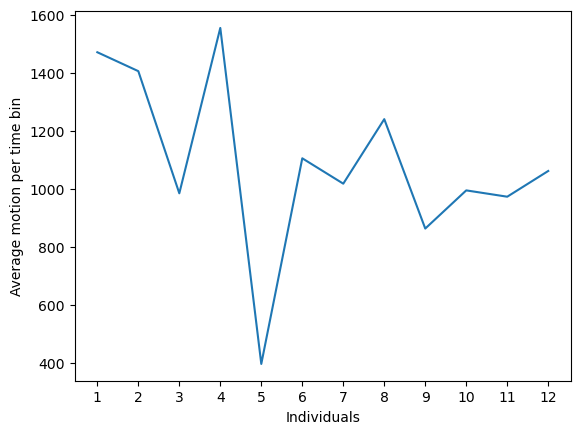

In [10]:
# show overall motion for individuals over experiment ... any outliers? dead?
print(individuals)
plt.plot(df[individuals].mean())
plt.xlabel('Individuals')
plt.ylabel('Average motion per time bin')
plt.show()

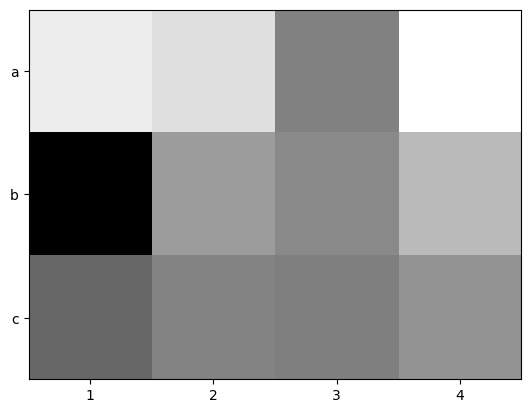

[[6518673.83390384 6229952.34248812 4364557.24918834 6890182.67536439]
 [1759115.15689909 4899093.54350239 4511712.16269633 5497156.89768392]
 [3826347.33967732 4409209.2666674  4312692.90275093 4705666.90323391]]


In [11]:
# another look at overall activity in plate ... are there any dead individuals that should be omitted?
# is the difference in illumination across the plate causing big problems?
totalActivity = df[individuals].sum().values
plateView = np.reshape(totalActivity,(3,4))
plt.imshow(plateView, interpolation='nearest', cmap = 'gray')
columns = np.array([1,2,3,4])
rows = ['a','b','c']
plt.xticks(columns-1, columns)
plt.yticks([0,1,2],rows) # or other way?
plt.show()

print(plateView)

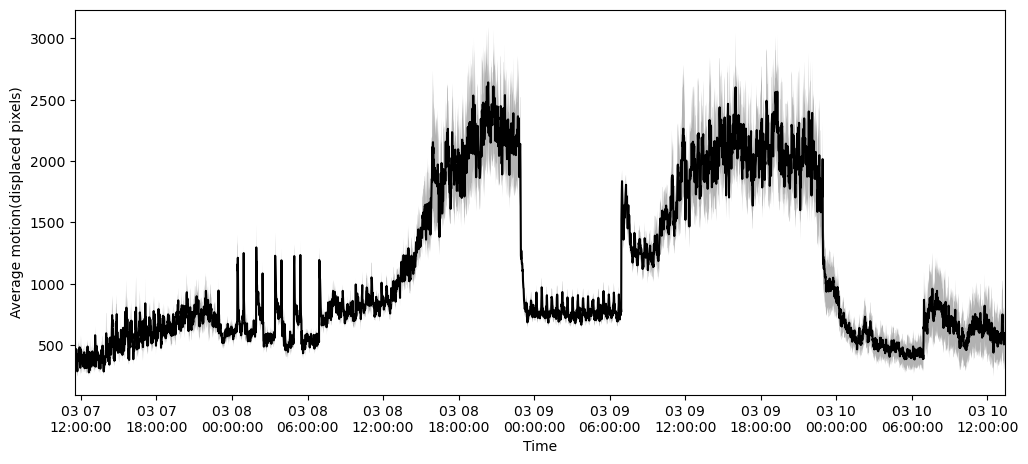

In [12]:
# ribbon plot of average motion
from matplotlib.ticker import MaxNLocator
def timeVdataRibbonPlot(ax,t,d,c, numticks=0): # axis, timeVec, data, color

    ax.plot(t,np.mean(d,axis=1),color=c)
    se = analysisTools.stde(d,1)
    ax.fill_between(t, np.mean(d,1)-se, np.mean(d,1)+se, alpha = 0.3, facecolor=c, edgecolor=None)
    ax.set_xlim([t[0],t[-1]])
    ax.xaxis.set_major_formatter( dates.DateFormatter('%m %d\n%H:%M:%S') )
    if numticks > 0:
        ax.xaxis.set_major_locator(MaxNLocator(numticks)) 
    return ax

d = df[individuals].values
t = df['time'].values
f,a = plt.subplots(figsize=(12,5))

a = timeVdataRibbonPlot(a,t,d,'k',15)
a.set_xlabel('Time')
a.set_ylabel('Average motion(displaced pixels)')
plt.show()

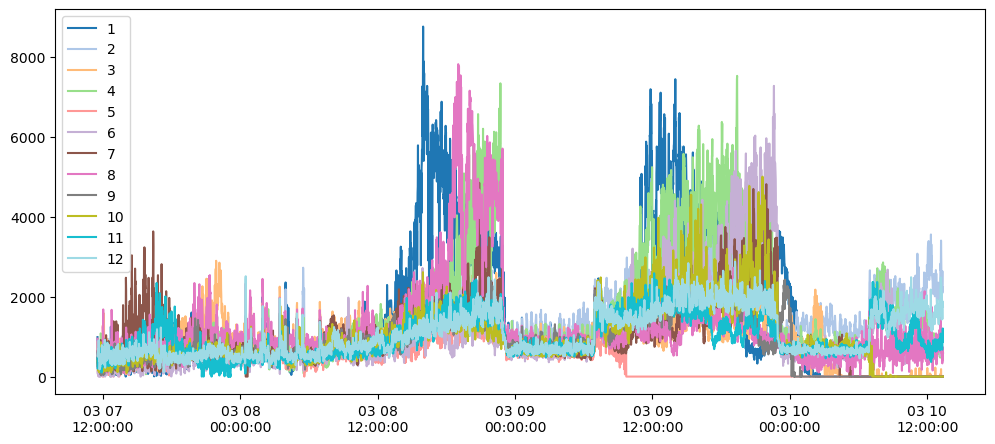

In [13]:
# plot activity of each individual in a different color
def multipleIndividualPlot(df, individuals):
    colormap = 'tab20'
    cols = analysisTools.make_N_colors(colormap, len(individuals))
    f,a = plt.subplots(figsize = (12,5))
    for i,individual in enumerate(individuals):
        plt.plot(df['time'].values, df[individual].values, color = cols[i] , label = individual)
    plt.legend()
    
    a.xaxis.set_major_formatter( dates.DateFormatter('%m %d\n%H:%M:%S') )
    plt.show()
    
multipleIndividualPlot(df,individuals)

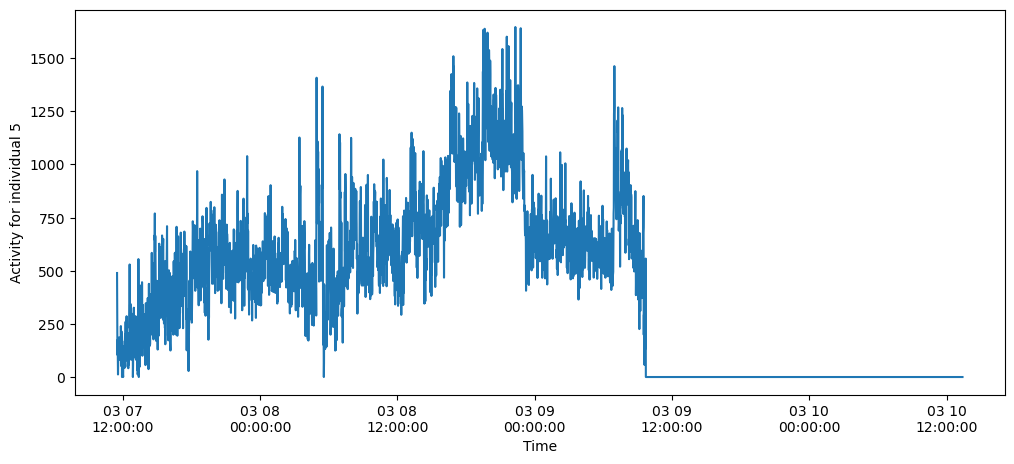

In [14]:
# plot a particular individual
individual_to_plot = 5

def oneIndividualPlot(individual=1):
    selection = str(individual)
    f,a = plt.subplots(figsize = (12,5))
    plt.plot(df['time'].values, df[selection].values)
    plt.ylabel('Activity for individual ' + selection)
    plt.xlabel('Time')
    a.xaxis.set_major_formatter( dates.DateFormatter('%m %d\n%H:%M:%S') )
    plt.show()
    
oneIndividualPlot(individual_to_plot)

# Select subset of data based on time

In [15]:
def timeslice(df, startdate, starttime, duration):
    # duration is in minutes
#     startdate = str(year) + '-' + str(month) + '-' + str(day)
#     starttime = str(hour) + ':' + str(minute) + ':' + str(seconds)
    startdatetime = startdate + ' ' + starttime
    
    delta = duration / (60*24)
    startdatenum = dates.datestr2num(startdatetime)
    startdatetime = dates.num2date(startdatenum)
    enddatenum = startdatenum + delta
    enddatetime = dates.num2date(enddatenum)
    
    print('Start is ', startdatetime, ' which is ', str(startdatenum))
    print('End is   ', enddatetime, ' which is ', str(enddatenum))
    timeselection = df[df['time'].between(startdatenum,enddatenum)]
    return timeselection

Start is  2023-03-08 23:00:00+00:00  which is  19424.958333333332
End is    2023-03-09 08:00:00+00:00  which is  19425.333333333332


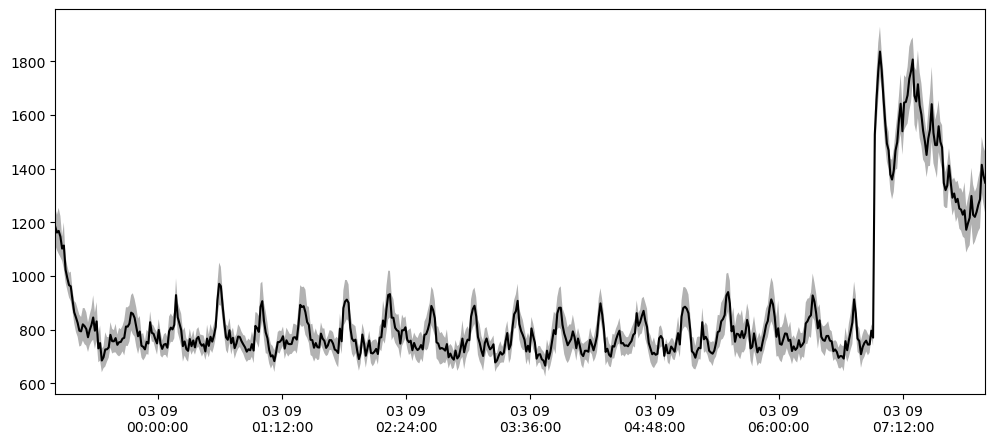

In [16]:
# for time of interest, enter date 'yyyy-mm-dd' and time 'hh:mm:ss'
# and enter desired time window (in minutes)

day = '2023-03-08'
time = '23:00:00'
duration = 540 # minutes ... 


ts = timeslice(df, day, time, duration)
d = ts[individuals].values
t = ts['time'].values
f,a = plt.subplots(figsize=(12,5))

a = timeVdataRibbonPlot(a,t,d,'k')#,15) # change number of ticks by including a number at end of arguments
plt.show()

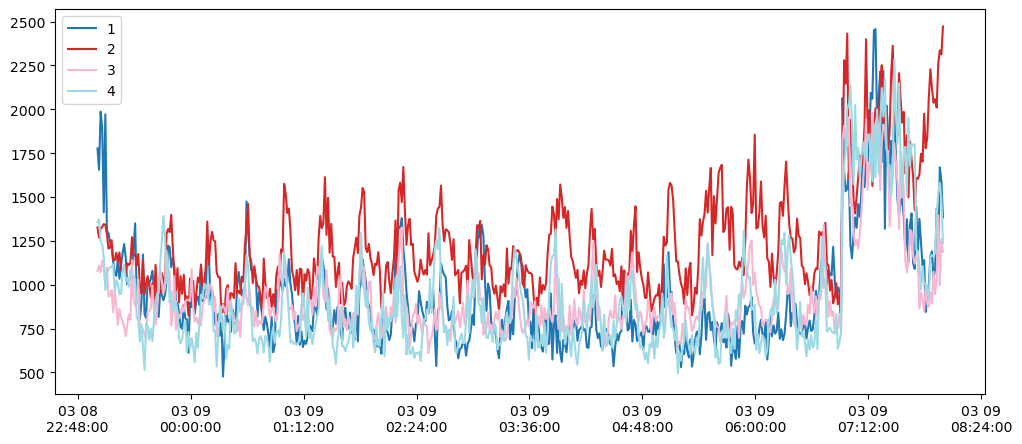

In [16]:
# can plot multiple individuals on the same plot, during time window of interest
multipleIndividualPlot(ts,['1','2','3','4'])

# Compare activity during two time windows

In [28]:
# for time of interest, enter date 'yyyy-mm-dd' and time 'hh:mm:ss'
# and enter desired time window (in minutes) ... the duration must be the same
# need to run the cell above with the timeslice function, if not run already

duration = 70 

day1 = '2023-03-08'
starttime1 = '06:50:00'

day2 = '2023-03-09'
starttime2 = '06:50:00'

Start is  2023-03-08 06:50:00+00:00  which is  19424.284722222223
End is    2023-03-08 08:00:00+00:00  which is  19424.333333333332
Start is  2023-03-09 06:50:00+00:00  which is  19425.284722222223
End is    2023-03-09 08:00:00+00:00  which is  19425.333333333332


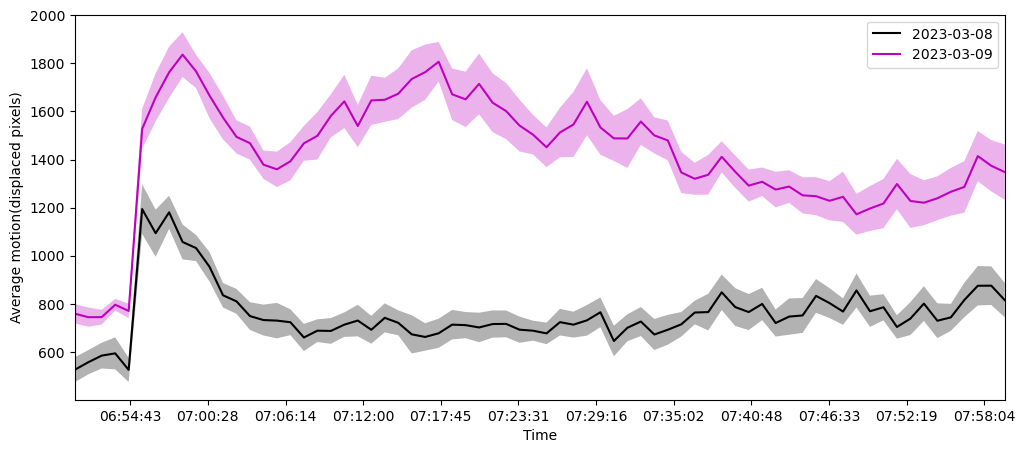

In [30]:
def plotTwoTimeWindows(ax, t, data, labels, colors, numticks=0): # axis, timeVec, data, color

    for i, d in enumerate(data):
        ax.plot(t, np.mean(d,axis=1),color=colors[i], label = labels[i])
        se = analysisTools.stde(d,1)
        ax.fill_between(t, np.mean(d,1)-se, np.mean(d,1)+se, alpha = 0.3, facecolor=colors[i], edgecolor=None)
    
    ax.set_xlim([t[0],t[-1]])
    ax.xaxis.set_major_formatter( dates.DateFormatter('%H:%M:%S') )
    if numticks > 0:
        ax.xaxis.set_major_locator(MaxNLocator(numticks)) 
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Average motion(displaced pixels)')
    ax.legend()
    
    return ax

ts1 = timeslice(df, day1, starttime1, duration)
d1 = ts1[individuals].values
t1 = ts1['time'].values

ts2 = timeslice(df, day2, starttime2, duration)
d2 = ts2[individuals].values
t2 = ts2['time'].values

f,a = plt.subplots(figsize=(12,5))

a = plotTwoTimeWindows(a, t1, [d1,d2], [day1,day2], ['k','m'], 13)
plt.show()